# Jetzt machen wir genau gleiche x und y aber die Unterschied ist die Nützung andere Aktivierungsfunktionen!

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,log_loss
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Simulation of some data
np.random.seed (245)
nobs =1000
x1= np.random.normal(size=nobs ,scale=1) 
x2= np.random.normal(size=nobs ,scale=1)
x3= np.random.normal(size=nobs ,scale=1)
X= np.c_[np.ones((nobs ,1)),x1,x2,x3]


y= -1.5 + -0.5*x1**2 -0.5*x2**2 +0.25*x3**2 + np.random.normal(size=nobs , scale=1)



OLS=sm.OLS(y,X).fit()
y_pred_OLS=OLS.predict(X)

In [3]:
X[:,0:5]

array([[ 1.        , -0.23276742,  2.21909962, -1.00408117],
       [ 1.        ,  0.81853041,  0.51334014,  0.86191678],
       [ 1.        , -0.97334932, -3.00031139,  0.86598633],
       ...,
       [ 1.        ,  1.62168608, -0.91076001, -0.60039352],
       [ 1.        , -0.18710805,  0.74539444, -0.31463947],
       [ 1.        , -1.39579166, -1.03862314,  0.32594296]])

In [4]:
y[0:5]

array([-5.14038861, -1.56918942, -5.63452662, -1.37463074, -1.13933778])

(array([  3.,  14.,  34., 100., 212., 281., 256.,  81.,  15.,   4.]),
 array([-7.86412286, -6.83753031, -5.81093776, -4.78434521, -3.75775266,
        -2.73116011, -1.70456756, -0.67797501,  0.34861754,  1.3752101 ,
         2.40180265]),
 <a list of 10 Patch objects>)

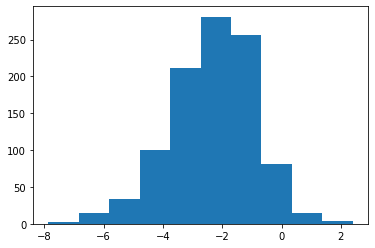

In [5]:
plt.hist(y)

## OLS Regression

In [6]:
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.208
Date:                Thu, 05 Dec 2019   Prob (F-statistic):              0.306
Time:                        21:14:32   Log-Likelihood:                -1776.1
No. Observations:                1000   AIC:                             3560.
Df Residuals:                     996   BIC:                             3580.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3196      0.045    -51.122      0.0

## The Neural Network

### Hyper parameters
### ich habe nicht gleiche Aktivierungsfunktion für alle meiner Neuronen

In [8]:
#Learningrate
LR=0.05


# Number of neurons
Neuron_Out=1
Neuron_Hidden=50

#The Activation function
Activate_output='linear' # für letzte Schicht verwende ich linear
Activate_hidden='sigmoid' # unterschied ist Hidden-Layer-Neuronen werden nicht linear transformiert


#The Optimizer
Optimizer= SGD(lr=LR)


# The loss function
loss='mean_squared_error'

### Construct the Neural Network

In [9]:
## Neural Network
from tensorflow import set_random_seed
set_random_seed (245)

#Initialize the ANN
model_ANN= Sequential()

# Hidden Layer
model_ANN.add(Dense(Neuron_Hidden, activation=Activate_hidden, input_shape=(4,), use_bias=False))

#Output Layer
model_ANN.add(Dense(Neuron_Out, activation=Activate_output,use_bias=False))
model_ANN.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 50        
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________


### Compile the Neural Network

In [10]:
model_ANN.compile(optimizer=Optimizer , loss=loss)

### Fit the Neural Network

In [11]:
#Fit the model
history_ANN=model_ANN.fit(
X, # training data
y, # training targets
epochs=500,verbose=1)



Epoch 1/500
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3629
Epoch 2/500
1000/1000 [==============================] - 0s 64us/step - loss: 2.1943
Epoch 3/500
1000/1000 [==============================] - 0s 55us/step - loss: 2.2333
Epoch 4/500
1000/1000 [==============================] - 0s 56us/step - loss: 2.2526
Epoch 5/500
1000/1000 [==============================] - 0s 63us/step - loss: 2.1445
Epoch 6/500
1000/1000 [==============================] - 0s 62us/step - loss: 2.1055
Epoch 7/500
1000/1000 [==============================] - 0s 62us/step - loss: 2.1399
Epoch 8/500
1000/1000 [==============================] - 0s 59us/step - loss: 2.0913
Epoch 9/500
1000/1000 [==============================] - 0s 61us/step - loss: 2.1177
Epoch 10/500
1000/1000 [==============================] - 0s 59us/step - loss: 2.1032
Epoch 11/500
1000/1000 [==============================] - 0s 53us/step - loss: 2.1004
Epoch 12/500
1000/1000 [==============================] - 0s 5

1000/1000 [==============================] - 0s 53us/step - loss: 1.0579
Epoch 186/500
1000/1000 [==============================] - 0s 53us/step - loss: 1.0562
Epoch 187/500
1000/1000 [==============================] - 0s 51us/step - loss: 1.0539
Epoch 188/500
1000/1000 [==============================] - 0s 52us/step - loss: 1.0638
Epoch 189/500
1000/1000 [==============================] - 0s 50us/step - loss: 1.0602
Epoch 190/500
1000/1000 [==============================] - 0s 51us/step - loss: 1.0443
Epoch 191/500
1000/1000 [==============================] - 0s 51us/step - loss: 1.0613
Epoch 192/500
1000/1000 [==============================] - 0s 51us/step - loss: 1.0730
Epoch 193/500
1000/1000 [==============================] - 0s 53us/step - loss: 1.0514
Epoch 194/500
1000/1000 [==============================] - 0s 52us/step - loss: 1.0804
Epoch 195/500
1000/1000 [==============================] - 0s 60us/step - loss: 1.0561
Epoch 196/500
1000/1000 [==============================] 

1000/1000 [==============================] - 0s 53us/step - loss: 1.0309
Epoch 374/500
1000/1000 [==============================] - 0s 61us/step - loss: 1.0213
Epoch 375/500
1000/1000 [==============================] - 0s 52us/step - loss: 1.0219
Epoch 376/500
1000/1000 [==============================] - 0s 51us/step - loss: 1.0250
Epoch 377/500
1000/1000 [==============================] - 0s 51us/step - loss: 1.0207
Epoch 378/500
1000/1000 [==============================] - 0s 62us/step - loss: 1.0169
Epoch 379/500
1000/1000 [==============================] - 0s 51us/step - loss: 1.0263
Epoch 380/500
1000/1000 [==============================] - 0s 51us/step - loss: 1.0323
Epoch 381/500
1000/1000 [==============================] - 0s 53us/step - loss: 1.0258
Epoch 382/500
1000/1000 [==============================] - 0s 51us/step - loss: 1.0183
Epoch 383/500
1000/1000 [==============================] - 0s 51us/step - loss: 1.0321
Epoch 384/500
1000/1000 [==============================] 

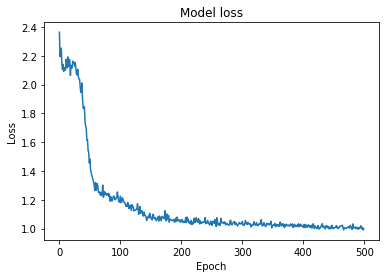

In [12]:
plt.plot(history_ANN.history['loss'])
#plt.plot(history_ANN.history['val_acc'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
print('Weights connecting the constant to 50 Neurons in the Hidden layer \n\n',model_ANN.layers[0].get_weights()[0][0])

Weights connecting the constant to 50 Neurons in the Hidden layer 

 [ 1.0348754  -0.42895576 -0.5878439   0.08490722 -0.6848453  -0.91700923
 -0.52992624 -0.65447056 -2.8922071  -0.56118155 -0.3466174  -0.2431663
 -0.73255014 -0.9720989  -0.75777054 -0.46912488 -0.5824501  -1.4285849
 -0.08804358 -1.6935909  -1.3880444  -1.9185476  -0.63018805 -0.82501686
 -1.1104614  -0.9214852  -3.9199994  -3.2942708  -0.8316097  -0.6471592
 -0.42505115 -0.240991   -0.42493513 -0.6799935  -3.3333948  -0.24918023
 -2.0567842  -0.653301   -1.0410166  -0.6527277  -0.6994715  -0.7838443
 -0.24724625 -0.04899453 -3.7500641  -0.4552429  -3.1248815  -0.8474555
 -0.80181885 -0.55279994]


In [14]:
print('Weights connecting X1 to 50 Neurons in the Hidden layer \n\n',model_ANN.layers[0].get_weights()[0][1])

Weights connecting X1 to 50 Neurons in the Hidden layer 

 [ 1.0629019   0.4031103   0.18567498  0.02615019 -0.45092735  0.1480433
  0.0689627   0.04018501 -1.3265877  -0.05896894 -0.12530719  0.03257891
 -0.06545558  0.02533201 -0.49647707 -0.07379184 -0.03375246  0.17853203
 -0.1301197   0.08988244 -0.48713577  0.07457998  0.00201289  0.39559728
  0.09291359  0.16538237  1.5644766  -0.12189148  0.03624357 -0.0872807
 -0.08144294  0.13196163 -0.08285387 -0.4351346  -1.0726532  -0.32361513
  1.5841885  -0.1796068  -0.14344007  0.06149485 -0.24550772  0.0229039
 -0.13169046  1.1220106  -0.06913649 -0.08849214  0.7882814   0.08060846
  0.0846245   0.25876078]


In [15]:
print('Weights connecting X2 to 50 Neurons in the Hidden layer \n\n',model_ANN.layers[0].get_weights()[0][2])

Weights connecting X2 to 50 Neurons in the Hidden layer 

 [-0.34228888  0.09298219  0.18190512 -0.264197   -0.19957164 -0.5707091
  0.11313219 -0.25409347 -0.99135566 -0.06337199 -0.02405789  0.01229273
  0.02346956  0.02869254  0.00822841 -0.12755004 -0.16741018  0.3100341
  0.01609723  0.14065272  0.61396587 -1.0948112   0.05652698 -0.16017275
 -0.8545678   0.6629309   0.94947463  0.3589706  -0.03408298  0.2596591
 -0.06246385  0.8390301  -0.05035438  0.23954228  0.16878839 -0.4110005
 -0.09653471 -0.10380635 -0.7644542   0.02039365 -0.35809174 -0.02916177
 -0.03061401  1.7770591   1.9175528  -0.11558183 -1.2312815   0.2567467
  0.08894061 -0.1309089 ]


In [16]:
print('Weights connecting X3 to 50 Neurons in the Hidden layer \n\n',model_ANN.layers[0].get_weights()[0][1])

Weights connecting X3 to 50 Neurons in the Hidden layer 

 [ 1.0629019   0.4031103   0.18567498  0.02615019 -0.45092735  0.1480433
  0.0689627   0.04018501 -1.3265877  -0.05896894 -0.12530719  0.03257891
 -0.06545558  0.02533201 -0.49647707 -0.07379184 -0.03375246  0.17853203
 -0.1301197   0.08988244 -0.48713577  0.07457998  0.00201289  0.39559728
  0.09291359  0.16538237  1.5644766  -0.12189148  0.03624357 -0.0872807
 -0.08144294  0.13196163 -0.08285387 -0.4351346  -1.0726532  -0.32361513
  1.5841885  -0.1796068  -0.14344007  0.06149485 -0.24550772  0.0229039
 -0.13169046  1.1220106  -0.06913649 -0.08849214  0.7882814   0.08060846
  0.0846245   0.25876078]


In [17]:
print('Weights connecting the 50 Neurons in the Hidden layer to the Output layer\n\n',model_ANN.layers[1].get_weights()[0])

Weights connecting the 50 Neurons in the Hidden layer to the Output layer

 [[ 1.4893034e+00]
 [ 3.6677122e-01]
 [-1.8023610e-01]
 [-5.4392588e-01]
 [-4.1866153e-01]
 [-3.5527134e-01]
 [-1.1082695e-01]
 [-1.9311672e-03]
 [-2.3347626e+00]
 [ 2.9507071e-01]
 [-3.4468141e-01]
 [ 2.9016702e-02]
 [-7.8461073e-02]
 [ 5.6380147e-01]
 [-3.9490297e-01]
 [-2.1339189e-01]
 [ 1.4820214e-01]
 [ 1.1197652e+00]
 [-4.6786478e-01]
 [ 1.2909833e+00]
 [-1.0563377e+00]
 [-1.6500965e+00]
 [-1.4146750e-01]
 [-1.7362884e+00]
 [-7.1050870e-01]
 [-6.0508853e-01]
 [-3.0551949e+00]
 [ 3.2554307e+00]
 [ 4.7634903e-01]
 [-2.0357682e-01]
 [-3.8442807e-03]
 [ 5.2709621e-01]
 [-1.5534474e-01]
 [-4.0113056e-01]
 [-3.7866607e+00]
 [ 2.4336523e-01]
 [-1.5229518e+00]
 [ 2.2592391e-01]
 [-6.3971126e-01]
 [ 3.0049849e-01]
 [-3.7297717e-01]
 [-8.6165778e-03]
 [-3.7701946e-01]
 [-1.5372473e+00]
 [-3.3297932e+00]
 [ 1.4488806e-01]
 [-2.7415440e+00]
 [ 1.0094199e+00]
 [ 1.6524065e-02]
 [ 2.1620123e-01]]


In [18]:
# Evaluation: Mean squared error ist bei NN double so gut wie Mean Squared Error in OLS ! 
# Grund: ich habe nicht lineare Transformation in Hidden-Layer-Neuron verwendet!

y_pred_ANN=model_ANN.predict(X)
print("MSE ANN:", mean_squared_error(np.ravel(y), np.ravel(y_pred_ANN )))
print("MSE OLS:", mean_squared_error(np.ravel(y), np.ravel(y_pred_OLS )))

MSE ANN: 0.9770908109789682
MSE OLS: 2.0428623165804765


### Real Fit Plot Neural Network

(-8.86412286072964, 3.401802646419812)

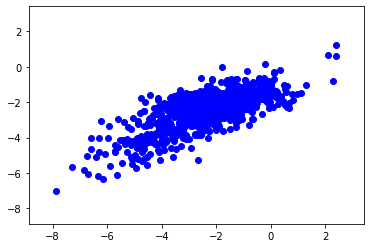

In [19]:
plt.plot(np.ravel(y),np.ravel(y_pred_ANN), 'bo')
plt.xlim((min(y)-1,max(y)+1))
plt.ylim((min(y)-1,max(y)+1))

# auf x-Axe ist echte y
# auf y-Axe ist geschätzte y -> y hat
# perfektes Modell muss eine Linie in der Mittelhalb ergeben -> bei NN schaut hier relativ ok 

### Real Fit Plot OLS

(-8.86412286072964, 3.401802646419812)

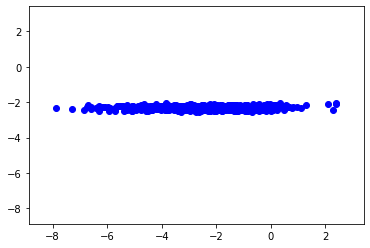

In [19]:
plt.plot(np.ravel(y),np.ravel(y_pred_OLS), 'bo')
plt.xlim((min(y)-1,max(y)+1))
plt.ylim((min(y)-1,max(y)+1))

# auf x-Axe ist echte y
# auf y-Axe ist geschätzte y -> y hat
# perfektes Modell muss eine Linie in der Mittelhalb ergeben -> bei OLS schaut hier nicht sehr gut aus 